# 로지스틱 회귀의 결정 경계

In [2]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

임의의 데이터 생성 

In [4]:
x = torch.randn(100, 2)
y = ((x[:, 0] > 0.5) & (x[:, 1] > 0.5)).float()

모델 정의 

In [9]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        outputs = self.linear(x)
        return F.sigmoid(outputs)
    
model = LogisticRegression(input_dim=2, output_dim=1)

모델 학습

In [11]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for epoch in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred.squeeze(), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

C:\Users\noeyx\anaconda3\envs\AI\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


결정 경계 그리기

C:\Users\noeyx\anaconda3\envs\AI\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


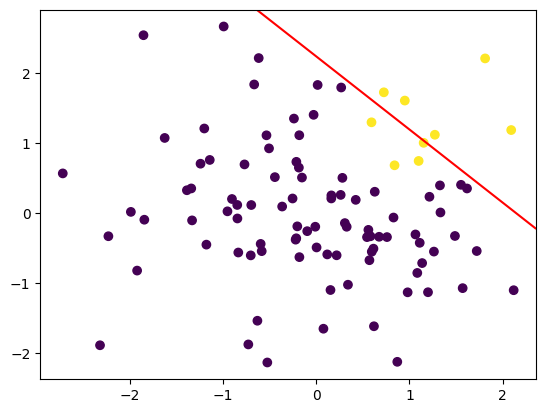

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y)
x_min, x_max = plt.xlim() # x 좌표 최솟값 최댓값
y_min, y_max = plt.ylim() # y 좌표 최솟값 최댓값

"""
np.meshgrid() => x, y 좌표를 기반으로 격자 포인트 생성


xx, yy  = > 2차원 배열을 가짐 
"""
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min,y_max,100))
z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()

"""
xx yy -> np.c_[]: xx yy 연결 ->  torch.tensor 변경하고 ravel() -> 2차원 배열 1차원 평면화 -> 변환된 입력 -
-> 모델 전달 -> .detach().numpy() 예측값을 넘파이 형태로 변환 -> z 에 저장
"""

z = z.reshape(xx.shape)
plt.contour(xx,yy,z, levels=[0.5], colors='r')

"""
plt.contour() -> xx, yy 격자에 대응하는 결정경계 그리는 함수 
"""
plt.show()